In [1]:
import tensorflow as tf
import pandas as pd

| Hyperparamter            | Binary Classification                                                                                                                                                                                                                                   | Multiclass Classification                                                                                                                                     |
|--------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Input Layer shape        | Same as number of features(e.g. 5 for age,sex,height, weight,smoking status in heart disease prerdiction)                                                                                                                                               | Same as Binary Classification                                                                                                                                 |
| Hidden Layers(s)         | Problem specific, minimum = 1, maximum = unlimited                                                                                                                                                                                                      | Same as Binary Classification                                                                                                                                 |
| Neurons per hidden layer | Problem specific, generally 10 to 100                                                                                                                                                                                                                   | Same as Binary Classification                                                                                                                                 |
| Output Layer Shape       | 1 (One class or the other)                                                                                                                                                                                                                              | 1 per class (e.g. 3 for food, person or dog photo)                                                                                                            |
| Hidden activation        | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectifier linear unit)                                                                                                                                  | Same as Binary Classification                                                                                                                                 |
| Output activation        | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function)                                                                                                                                                                                               | [Softmax](https://en.wikipedia.org/wiki/Softmax_function)                                                                                                     |
| Loss Functions           | [Cross entrophy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer                | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD)(stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)                                                                     | Same as Binary Classification                                                                                                                                 |


## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 100 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples,
                   noise=0.03,
                    random_state=42)

In [3]:
# Check the labels
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

#### Our data is a little  hard to understand right now...let's visualize it

In [5]:
circles = pd.DataFrame({"X0": X[:,0 ], "X1":X[:, 1], "label":y})
circles # X0 is all of the items in 0th axis and X1 in all of the otems in 1st axis

X0        X1  label
0    0.754246  0.231481      1
1   -0.756159  0.153259      1
2   -0.815392  0.173282      1
3   -0.393731  0.692883      1
4    0.442208 -0.896723      0
..        ...       ...    ...
995  0.244054  0.944125      0
996 -0.978655 -0.272373      0
997 -0.136900 -0.810012      1
998  0.670362 -0.767502      0
999  0.281057  0.963824      0

[1000 rows x 3 columns]

In [6]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

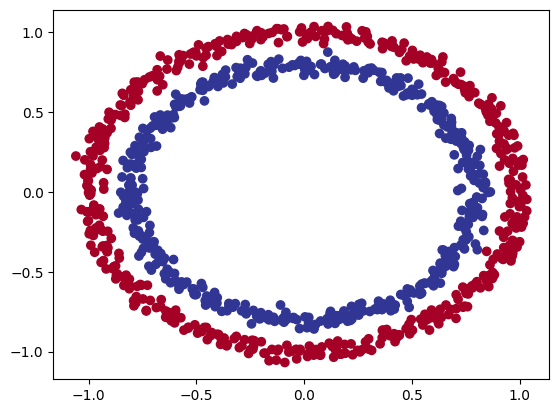

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

### input and output shapess

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Modelling

In [10]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

model_1.fit(X, y, epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 6.3489 - accuracy: 0.4820
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 6.1489 - accuracy: 0.4780
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 5.5267 - accuracy: 0.5050
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 5.0672 - accuracy: 0.5320
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 6.3232 - accuracy: 0.5130
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 7.1660 - accuracy: 0.4900
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 7.1564 - accuracy: 0.4900
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 7.1554 - accuracy: 0.4890
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 7.1538 - accuracy: 0.4870
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 7.1534 - accuracy: 0.4860


In [11]:
# Let's train longer to see if it's improving
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [12]:
# Let's add an another layer
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

model_2.fit(X, y, epochs=100,verbose=0)

In [13]:
# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5000


[0.6950286030769348, 0.5]

## Improving the model

In [14]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
# Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.5100


[0.698853075504303, 0.5099999904632568]

## To visualize our prediction, let's create a function `plot_decision_boundary()`, this function will:
- Take in a trained model, features(X), labels(y)
- Create a meshgrid of the different X values
- Make predictions across the meshgrid
- plot the predictions as well as a line between zones(where each unique class falls)

In [16]:
import numpy as np

In [17]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), #evanly spaced 100 numbers x_min and x_max
                     np.linspace(y_min, y_max, 100))

data = pd.DataFrame({"x_min": X[:, 0].min() - 0.1, "x_max": X[:, 0].max() + 0.1,
                    "xx": np.linspace(x_min, x_max, 100),
                    "yy": np.linspace(y_min, y_max, 100)})
data

x_min     x_max        xx        yy
0  -1.159502  1.133712 -1.159502 -1.167768
1  -1.159502  1.133712 -1.136339 -1.144498
2  -1.159502  1.133712 -1.113175 -1.121227
3  -1.159502  1.133712 -1.090011 -1.097957
4  -1.159502  1.133712 -1.066847 -1.074687
..       ...       ...       ...       ...
95 -1.159502  1.133712  1.041057  1.042922
96 -1.159502  1.133712  1.064220  1.066192
97 -1.159502  1.133712  1.087384  1.089463
98 -1.159502  1.133712  1.110548  1.112733
99 -1.159502  1.133712  1.133712  1.136004

[100 rows x 4 columns]

In [18]:
def plot_decision_boundary(model, X, y):
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), #evanly spaced 100 numbers x_min and x_max
                         np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make prediction
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


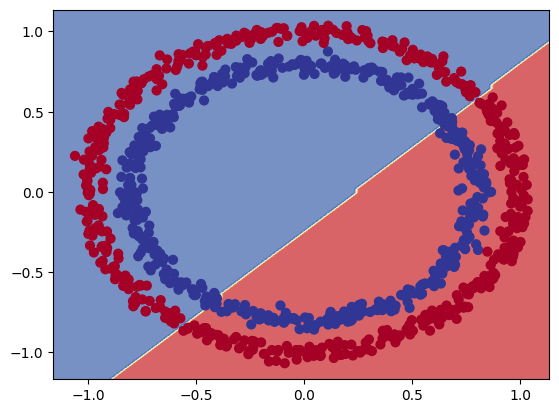

In [19]:
# check out predictions our model is making
plot_decision_boundary(model_3, X, y)

### By looking at the plot, lets try to implement in regression

we created the model for binary classification, so if we run the model and fit the below data it will threw an error so, we want to change the model

In [20]:
# Let's see if our model can be used for regression problem...
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and testing sets
x_reg_train = X_regression[:150]
x_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
# model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

In [21]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])
model_3.fit(tf.expand_dims(x_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 543.0517 - mae: 543.0517
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 427.4968 - mae: 427.4968
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 316.3298 - mae: 316.3298
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 201.0524 - mae: 201.0524
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 83.5445 - mae: 83.5445
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 68.5833 - mae: 68.5833
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 85.6031 - mae: 85.6031
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 60.3429 - mae: 60.3429
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 45.7192 - mae: 45.7192
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 51.0342 - mae: 51.0342
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 4ms/step


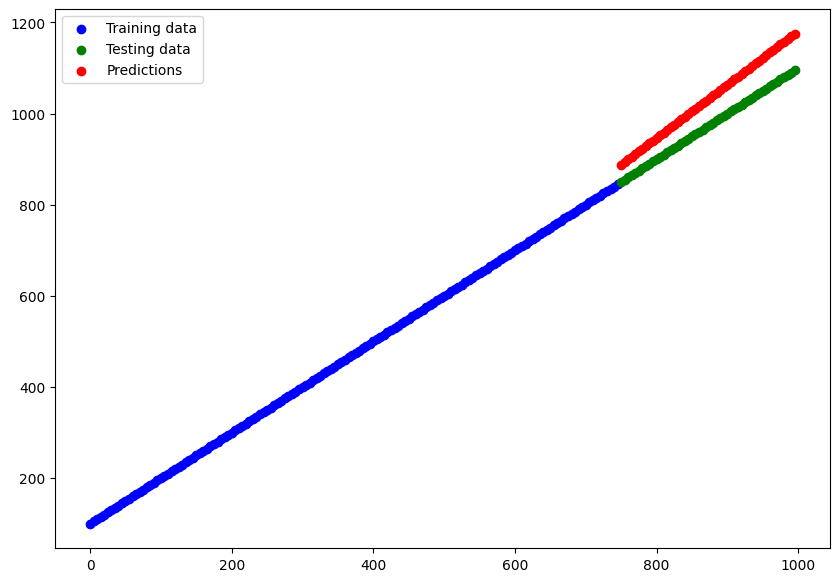

In [22]:
# Make predictins with our trained model
y_reg_preds = model_3.predict(x_reg_test)

#plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(x_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(x_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(x_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();

## The missing piece: Non-Linearity

In [23]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])
model_4.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=['accuracy'])
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.5700 - accuracy: 0.4780
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5179 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4933 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4677 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4021 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3827 - accuracy: 0.4750
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3231 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2568 - accuracy: 0.4770
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.0870 - accuracy: 0.4790
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8151 - accuracy: 0.4750
Epoch 11/

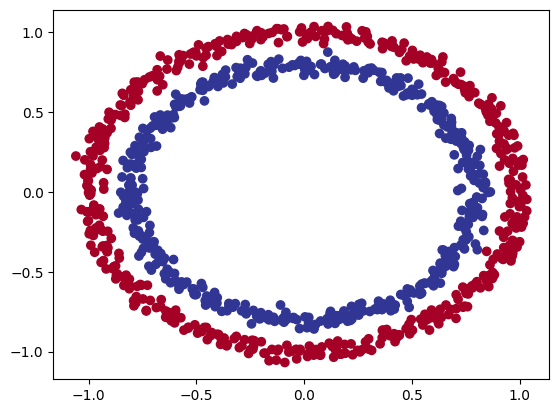

In [24]:
# check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classification


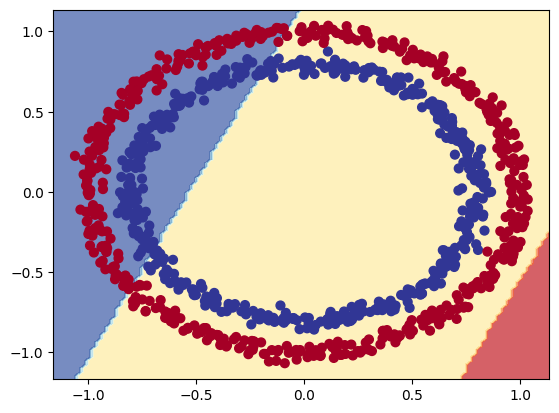

In [25]:
#check the decision boundary for our latest model
plot_decision_boundary(model_4,X, y)

### Let's try build our first neural network with non-linear activation function

In [26]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

history = model_5.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.6481 - accuracy: 0.4770
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5333 - accuracy: 0.4760
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4837 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4556 - accuracy: 0.4760
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4206 - accuracy: 0.4780
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4120 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4061 - accuracy: 0.4770
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4010 - accuracy: 0.4750
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3965 - accuracy: 0.4730
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3924 - accuracy: 0.4710
Epoch 11/

### Model 6

In [27]:
# We're gonna replicate the multi-layer neraul network from tensorflow playground
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])
history = model_6.fit(X, y, epochs=250, verbose=0)

In [28]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classification


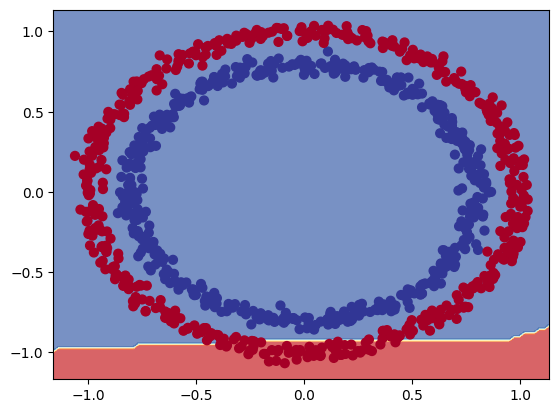

In [29]:
# How do our model prediction look?
plot_decision_boundary(model_6, X, y)

In [30]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"), 
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.7016 - accuracy: 0.4750
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.4980
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5010
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5850
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.5590
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.6260
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6191 - accuracy: 0.6720
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.7140
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.7960
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.8490
Epoch 11/

In [31]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 0.9970


[0.025784390047192574, 0.996999979019165]

313/313 [==============================] - 1s 2ms/step
doing binary classification


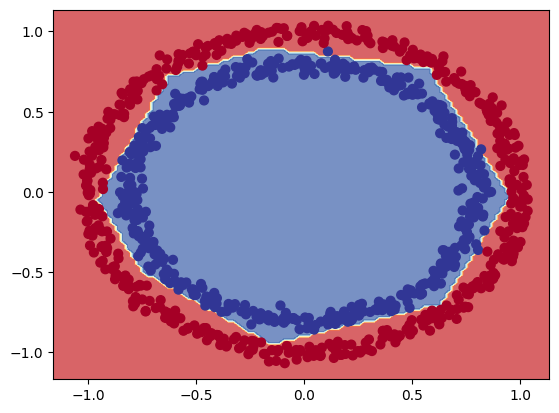

In [32]:
# Let's visualize our increadible metrics
plot_decision_boundary(model_7, X, y)

The combination of **Linear(straight lines)** and **non-linear(non-straight lines)** functions is one of the key fundamentals of neural networks,

In [33]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

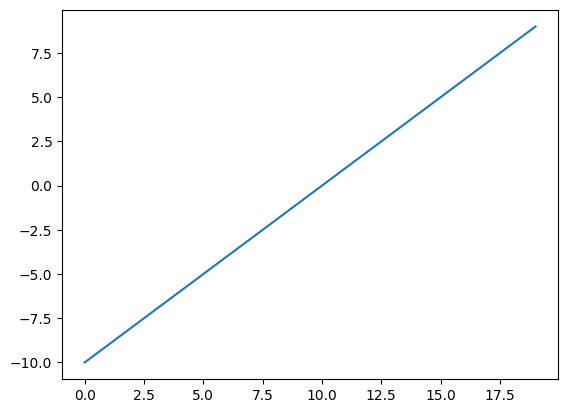

In [34]:
# Visualize our toy tensor
plt.plot(A)

In [35]:
# Let's start by replicating sigmoid - sigmoid(x) = 1/ (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

In [36]:
# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

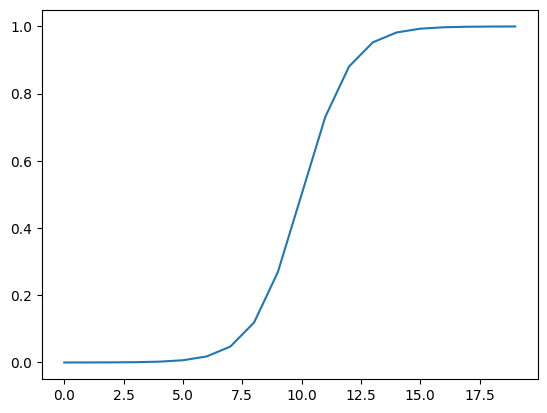

In [37]:
# plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [38]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(0,x)

In [39]:
#Let's pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

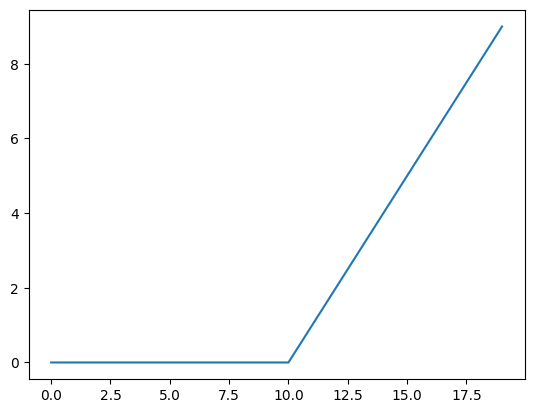

In [40]:
# place our toy tensor tranformed by relu
plt.plot(relu(A))

In [41]:
# Let's try Linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

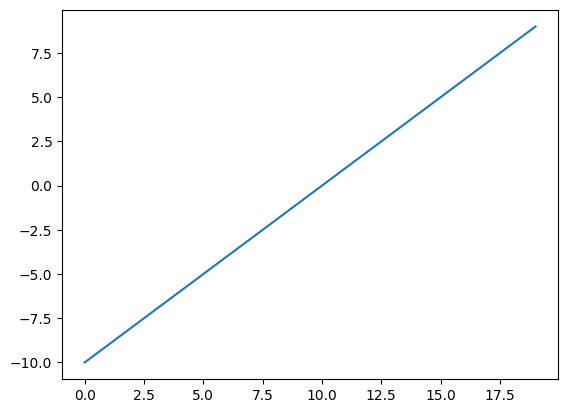

In [42]:
# Does the linear activatio function change anything?
plt.plot(tf.keras.activations.linear(A))

In [43]:
# Does A evan change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

### Evaluationg and improving classification model

So far we've been training and testing on the same dataset...
 However, in machine learning this is basically a sin.
 So let's create a training and test set.

In [44]:
# Check how many examples we have
len(X)

1000

In [45]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [46]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [47]:
# Let's re-create a model to fit on the training data and evaluate on the testing data
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.4913
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5537
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5875
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.7150
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6862
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.7275
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5221 - accuracy: 0.8375
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.8900
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3635 - accuracy: 0.9450
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2725 - accuracy: 0.9950
Epoch 11/25
25/25 [

In [48]:
# Evalute the model on test data set
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9900


[0.03275780752301216, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


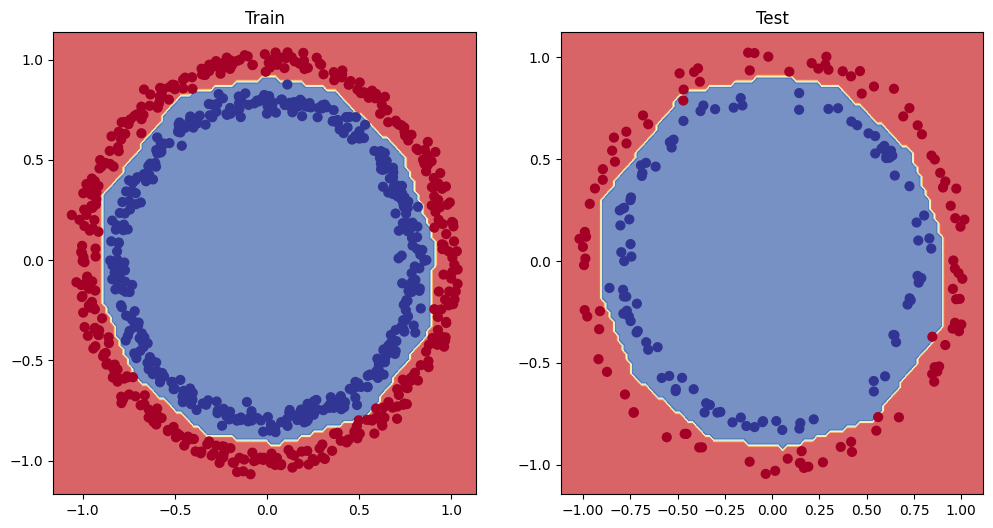

In [49]:
# plot the decision boundaries for training and test data set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show()

### plot the loss (or training) curves

In [50]:
history.history # History Tracks loss and accuracy of every epochs

{'loss': [0.6927842497825623,
  0.6839805841445923,
  0.6740339398384094,
  0.6575424075126648,
  0.6358364224433899,
  0.590232789516449,
  0.522132158279419,
  0.4468734860420227,
  0.3635333776473999,
  0.2725268304347992,
  0.2078811526298523,
  0.15515568852424622,
  0.11974535882472992,
  0.09645583480596542,
  0.07562914490699768,
  0.06413552165031433,
  0.05677857995033264,
  0.05025966092944145,
  0.04452488571405411,
  0.0428699366748333,
  0.03647632524371147,
  0.032437972724437714,
  0.029543282464146614,
  0.028978900983929634,
  0.02477608434855938],
 'accuracy': [0.49125000834465027,
  0.5537499785423279,
  0.5874999761581421,
  0.7149999737739563,
  0.6862499713897705,
  0.7275000214576721,
  0.8374999761581421,
  0.8899999856948853,
  0.9449999928474426,
  0.9950000047683716,
  0.9925000071525574,
  0.9937499761581421,
  0.9962499737739563,
  0.9987499713897705,
  0.9987499713897705,
  0.9987499713897705,
  1.0,
  0.9962499737739563,
  0.9987499713897705,
  1.0,
  1.

In [51]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

loss  accuracy
0   0.692784   0.49125
1   0.683981   0.55375
2   0.674034   0.58750
3   0.657542   0.71500
4   0.635836   0.68625
5   0.590233   0.72750
6   0.522132   0.83750
7   0.446873   0.89000
8   0.363533   0.94500
9   0.272527   0.99500
10  0.207881   0.99250
11  0.155156   0.99375
12  0.119745   0.99625
13  0.096456   0.99875
14  0.075629   0.99875
15  0.064136   0.99875
16  0.056779   1.00000
17  0.050260   0.99625
18  0.044525   0.99875
19  0.042870   1.00000
20  0.036476   1.00000
21  0.032438   0.99875
22  0.029543   1.00000
23  0.028979   0.99875
24  0.024776   1.00000

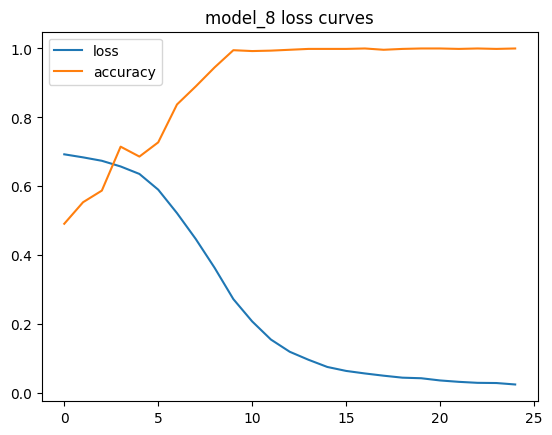

In [52]:
# plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves");

**Note:** For many problems, the loss function going down means the model is improving(the predictions it's making are getting ground truth labels)

### Finding the best learning rate
To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you cam ass to your **While** it;s training

### Create a new model

In [53]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_9.compile(loss="binary_crossentropy",
                optimizer = "Adam",
               metrics=["accuracy"])

# Create a learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) #every epcoh to traverse a set of learning rate values, starting from 10^-4 and increasing by ten to the power of epoch divided by 20 every epoch  
# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                      y_train,
                     epochs=100,
                     callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6883 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5025 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

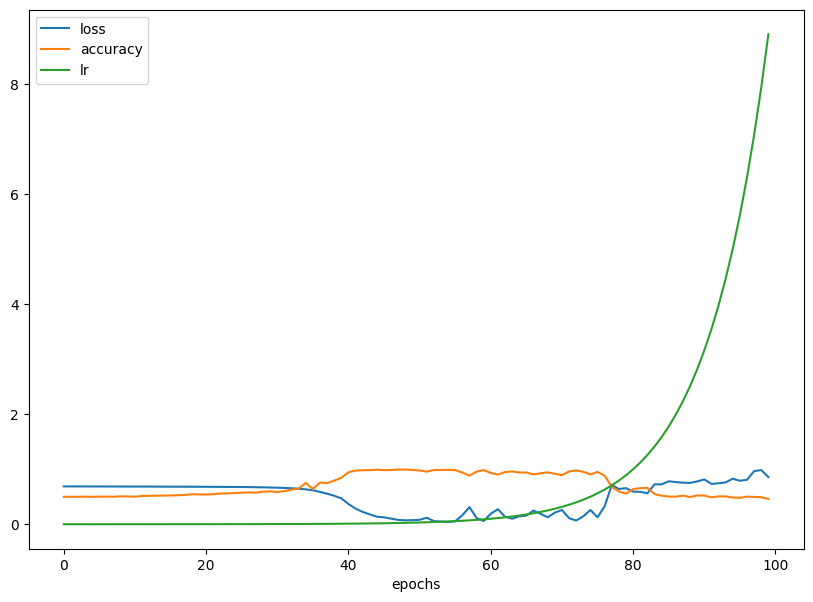

In [54]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs");

In [55]:
# plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [56]:
len(lrs)

100

Text(0, 0.5, 'Learning rate vs loss')

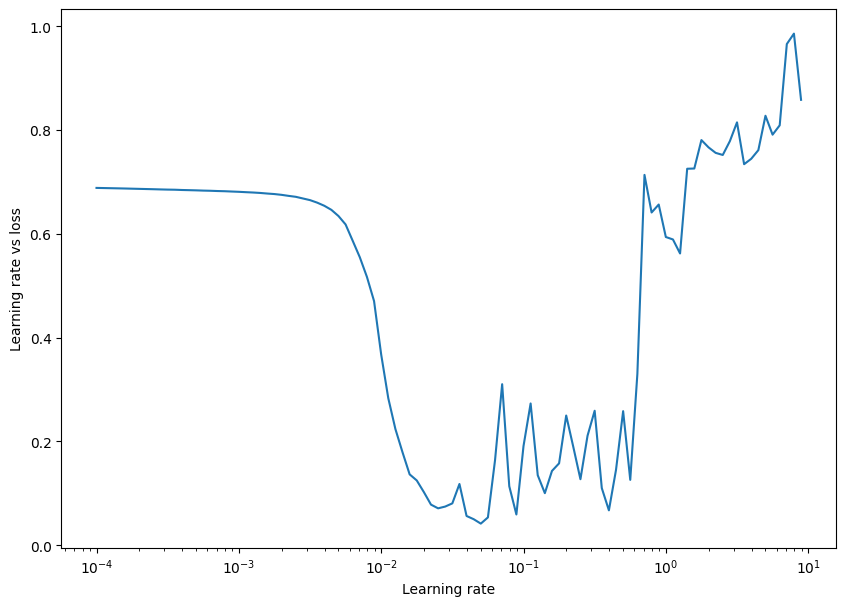

In [57]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs , history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Learning rate vs loss")

In [58]:
# Example of other typical learning rates values:
10**0, 10**-1,10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [59]:
# Let's try this learning rate
10**-2

0.01

In [60]:
# Let's try using a higher *Ideal* learning rate with the same model as1before
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6918 - accuracy: 0.5100
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6797 - accuracy: 0.5550
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6640 - accuracy: 0.5850
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6484 - accuracy: 0.6175
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.7250
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5638 - accuracy: 0.7475
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.7837
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.8400
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8687
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.9087
Epoch 11/20
25/25 [

In [61]:
# Evaluate model_10 on test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1418 - accuracy: 0.9450


[0.14178338646888733, 0.9449999928474426]

In [62]:
model_8.evaluate(X_train, y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 1.0000


[0.024190912023186684, 1.0]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


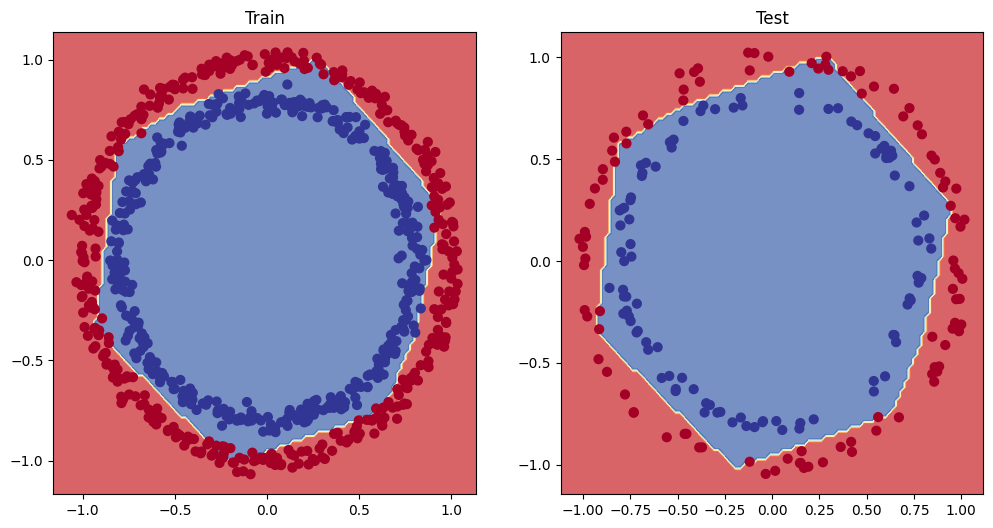

In [63]:
# plot the decision boundarries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show()

### More classification evaluatione method
Alongside visualizing our models results as mush as peoosible, there are a handfull of other classification evaluation methods & metrics you should be familiar with.
* Accuracy
* Precision - Higher precision leads to less false positives
* Recall - Higher recall leads to less false negatives
* F1-score - combines precision and recall into one metric
* Confusion Matrix
* Classification report (from scikit-learn)

In [64]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set : {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.1418 - accuracy: 0.9450
Model loss on the test set : 0.14178338646888733
Model accuracy on the test set: 94.50%


## Confusion Matrix

In [65]:
from sklearn.metrics import confusion_matrix

# Make prediction
y_preds = model_10.predict(X_test)
y_preds

7/7 [==============================] - 0s 2ms/step


array([[0.93210065],
       [0.95410895],
       [0.95410895],
       [0.95410895],
       [0.37809524],
       [0.02870547],
       [0.95410895],
       [0.01504883],
       [0.95410895],
       [0.10632329],
       [0.94839126],
       [0.32717624],
       [0.8851802 ],
       [0.9399298 ],
       [0.95410895],
       [0.95410895],
       [0.9511585 ],
       [0.8744311 ],
       [0.39678097],
       [0.9335269 ],
       [0.02158328],
       [0.9326911 ],
       [0.95410895],
       [0.9537355 ],
       [0.01472547],
       [0.8441862 ],
       [0.95410895],
       [0.4398153 ],
       [0.0231012 ],
       [0.95410895],
       [0.02054847],
       [0.95410895],
       [0.95410895],
       [0.04661069],
       [0.08875195],
       [0.95410895],
       [0.851259  ],
       [0.95410895],
       [0.95410895],
       [0.95410895],
       [0.95410895],
       [0.8226466 ],
       [0.95410895],
       [0.5290149 ],
       [0.95410895],
       [0.879704  ],
       [0.9371185 ],
       [0.020

In [66]:
# Create a confusion matrix
#confusion_matrix(y_test, y_preds)
# gets a ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [67]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [68]:
y_preds[:10]

array([[0.93210065],
       [0.95410895],
       [0.95410895],
       [0.95410895],
       [0.37809524],
       [0.02870547],
       [0.95410895],
       [0.01504883],
       [0.95410895],
       [0.10632329]], dtype=float32)

Oops....looks like our predictions array has come out in **predictions probability** form... the standard output from the sigmoid (or softmax) activation functions

In [69]:
# convert prediction probability to binary format
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [70]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[90, 11],
       [ 0, 99]], dtype=int64)

How about we prettify our confusion matrix?

C:\Users\shrih\AppData\Local\Temp\ipykernel_6532\1641095634.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set(title = "Confusion Matrix",


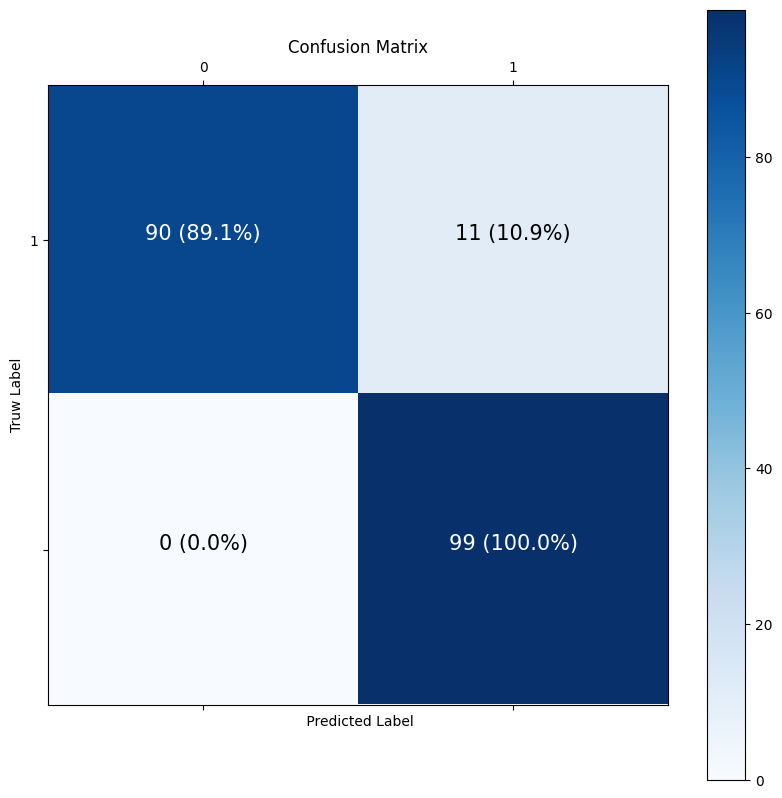

In [71]:
import itertools
figsize = (10, 10)

# create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]
# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create amtrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title = "Confusion Matrix",
      xlabel = " Predicted Label",
      ylabel = "Truw Label",
      xticks = np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)